# Practica 1: Econometría 2024-2025

In [4]:
import pandas as pd #librería para manejo de datos

datos = pd.read_csv("https://rtgodwin.com/data/houseprice.csv") #Lee base
datos

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms
0,132500,0.09,0,42,50000,0,0,Electric,Electric,Private,906,35,2,1,1.0,5
1,181115,0.92,0,0,22300,0,0,Gas,Hot Water,Private,1953,51,3,0,2.5,6
2,109000,0.19,0,133,7300,0,0,Gas,Hot Water,Public,1944,51,4,1,1.0,8
3,155000,0.41,0,13,18700,0,0,Gas,Hot Air,Private,1944,51,3,1,1.5,5
4,86060,0.11,0,0,15000,1,1,Gas,Hot Air,Public,840,51,2,0,1.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,0,32,24200,0,0,Gas,Hot Water,Public,2310,61,5,1,2.5,11
1724,285000,0.94,0,37,36200,0,0,Gas,Hot Water,Public,2564,61,4,1,2.5,11
1725,194900,0.39,0,9,20400,0,0,Gas,Hot Air,Public,1099,51,2,0,1.0,3
1726,125000,0.24,0,48,16800,0,0,Gas,Hot Air,Public,1225,51,3,1,1.0,7


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Price          1728 non-null   int64  
 1   Lot.Size       1728 non-null   float64
 2   Waterfront     1728 non-null   int64  
 3   Age            1728 non-null   int64  
 4   Land.Value     1728 non-null   int64  
 5   New.Construct  1728 non-null   int64  
 6   Central.Air    1728 non-null   int64  
 7   Fuel.Type      1728 non-null   object 
 8   Heat.Type      1728 non-null   object 
 9   Sewer.Type     1728 non-null   object 
 10  Living.Area    1728 non-null   int64  
 11  Pct.College    1728 non-null   int64  
 12  Bedrooms       1728 non-null   int64  
 13  Fireplaces     1728 non-null   int64  
 14  Bathrooms      1728 non-null   float64
 15  Rooms          1728 non-null   int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 216.1+ KB


In [9]:
datos["Fuel.Type"].value_counts()

,count
Fuel.Type,
Gas,1197
Electric,315
Oil,216


In [17]:
datos["Price"].value_counts()

,count
Price,
150000,21
225000,21
120000,21
155000,19
195000,18
...,...
470000,1
164400,1
362710,1


In [18]:
precios=datos["Price"]

In [19]:
precios

,Price
0,132500
1,181115
2,109000
3,155000
4,86060
...,...
1723,289000
1724,285000
1725,194900
1726,125000


In [20]:
precios.mean()

211966.7054398148

In [21]:
 precios.min()

5000

In [22]:
precios.max()

775000

In [23]:
precios.max()-precios.min()

770000

In [24]:
precios.median()

189900.0

In [27]:
precios.quantile(0.25)

145000.0

In [28]:
precios.quantile(0.75)

259000.0

In [29]:
precios.quantile(0.75)-precios.quantile(0.25)

114000.0

In [30]:
precios.var()

9690707465.040573

In [31]:
precios.std()

98441.39101536799

In [32]:
precios.mode()

,Price
0,120000
1,150000
2,225000


In [33]:
precios.describe()

,Price
count,1728.000000
mean,211966.705440
std,98441.391015
min,5000.000000
25%,145000.000000
50%,189900.000000
75%,259000.000000
max,775000.000000


<Axes: xlabel='Price', ylabel='Count'>

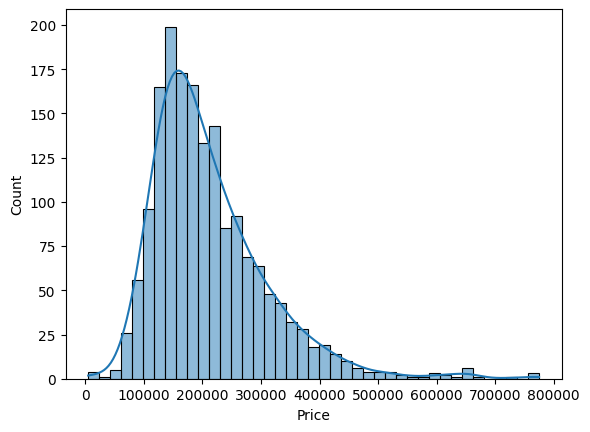

In [41]:
import seaborn as sns

sns.histplot(precios, kde=True)

In [42]:
precios.skew()

1.5777134366217407

In [43]:
precios.kurtosis()

4.191532076249885

<Axes: ylabel='Price'>

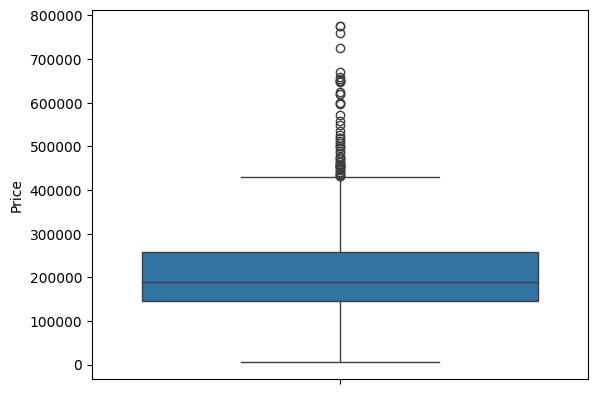

In [44]:
sns.boxplot(precios)

In [45]:
combustible=datos["Fuel.Type"]

In [46]:
combustible

,Fuel.Type
0,Electric
1,Gas
2,Gas
3,Gas
4,Gas
...,...
1723,Gas
1724,Gas
1725,Gas
1726,Gas


In [48]:
combustible.value_counts()

,count
Fuel.Type,
Gas,1197
Electric,315
Oil,216


<Axes: xlabel='Fuel.Type', ylabel='Percent'>

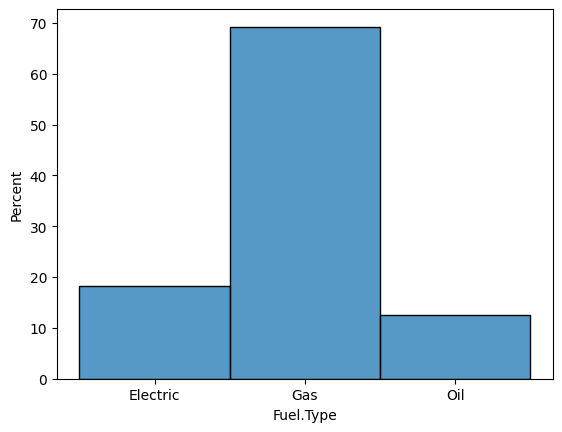

In [53]:
sns.histplot(combustible, stat="percent")

In [55]:
dumis_nuevas= pd.get_dummies(combustible)

In [56]:
datos = pd.concat([datos, dumis_nuevas], axis=1)

In [57]:
datos

,Price,Lot.Size,Waterfront,Age,Land.Value,New.Construct,Central.Air,Fuel.Type,Heat.Type,Sewer.Type,Living.Area,Pct.College,Bedrooms,Fireplaces,Bathrooms,Rooms,Electric,Gas,Oil
0,132500,0.09,0,42,50000,0,0,Electric,Electric,Private,906,35,2,1,1.0,5,True,False,False
1,181115,0.92,0,0,22300,0,0,Gas,Hot Water,Private,1953,51,3,0,2.5,6,False,True,False
2,109000,0.19,0,133,7300,0,0,Gas,Hot Water,Public,1944,51,4,1,1.0,8,False,True,False
3,155000,0.41,0,13,18700,0,0,Gas,Hot Air,Private,1944,51,3,1,1.5,5,False,True,False
4,86060,0.11,0,0,15000,1,1,Gas,Hot Air,Public,840,51,2,0,1.0,3,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,0,32,24200,0,0,Gas,Hot Water,Public,2310,61,5,1,2.5,11,False,True,False
1724,285000,0.94,0,37,36200,0,0,Gas,Hot Water,Public,2564,61,4,1,2.5,11,False,True,False
1725,194900,0.39,0,9,20400,0,0,Gas,Hot Air,Public,1099,51,2,0,1.0,3,False,True,False
1726,125000,0.24,0,48,16800,0,0,Gas,Hot Air,Public,1225,51,3,1,1.0,7,False,True,False
